In [324]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import pandas as pd
from src.experiments.synthetic import *
from src.utils import get_traces

sns.set_theme()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [326]:
torch.manual_seed(10)
samplable = Example(grad_noise=0.)
sampler = Hamiltonian(n_steps=50, step_size=0.02).setup(samplable)
trace_data = get_traces(sampler, 50)

In [327]:
is_accepted = trace_data.groupby(level=0).last()["accepted"]
accepted_traces = is_accepted.index[is_accepted]
accepted_states = trace_data.loc[accepted_traces].groupby(level=0).last()

initial_states  = trace_data.groupby(level=0).first()

In [328]:
by_trace = trace_data.groupby(level=0)
momentum_updates = by_trace.last().copy().rename(columns={"momentum" : "momentum_from"})
del momentum_updates["accepted"]
momentum_updates.loc[momentum_updates.index[:-1], "momentum_to"] = by_trace.first().loc[1:]["momentum"].values
momentum_updates = momentum_updates.reset_index().melt(
    id_vars=["trace", "value"],
    value_name="momentum",
).sort_values("trace").reset_index(drop=True)
del momentum_updates["variable"]

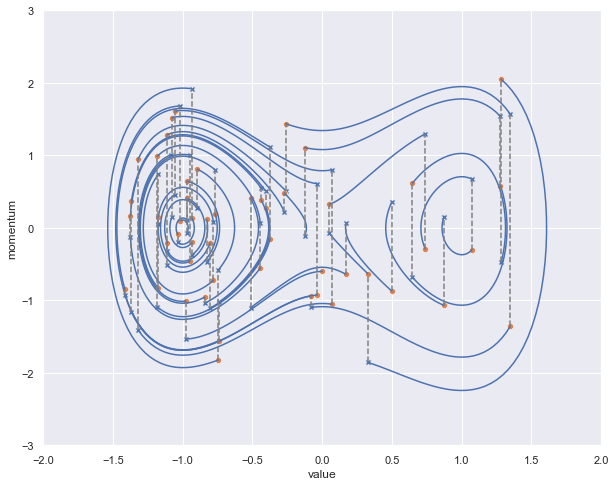

In [329]:
plt.figure(figsize=(10, 8))
sns.lineplot(
    x="value", y="momentum", data=trace_data, sort=False, units="trace", estimator=None
)
sns.scatterplot(x="value", y="momentum", data=accepted_states, marker="X", sizes=20)
sns.scatterplot(x="value", y="momentum", data=initial_states, marker="o")
sns.lineplot(
    x="value",
    y="momentum",
    color="grey",
    units="trace",
    estimator=None,
    data=momentum_updates,
    linestyle="dashed",
)
final_states = trace_data.groupby(level=0).last()
plt.xlim(-2, 2)
plt.ylim(-3, 3)
plt.show()
